## Факторный анализ: методы предпосылки, методы проведения, анализ результатов.

**Фактоный анализ** - метод анализа данных, который используется для выявления скрытых факторов, влияющих на наблюдаемые переменные и уменьшения размерности массива данных.  
**Фактор** - скрытая переменная, объясняющая связь между совокупностью переменных.  
Например, у нас есть данные о продаже квартир: 1 - удалённость от метро, 2-  наличие огнетушителей, 3 - наличие ремонта, 4 -  количество открытых люков перед подъездом. 
При применении факторного анализа обнаруживается сильная зависимость между показателями 1 и 3, 2 и 4, тогда мы можем выделить следующие факторы: комфортабельность (показатели 1 и 3), безопасность (показатели 2 и 4), при этом сохранив влияние всех переменных.  
Применение методов факторного анализа выглядит следующим образом:

[![2024-12-10-21-41-59.png](https://i.postimg.cc/8CFsL0mM/2024-12-10-21-41-59.png)](https://postimg.cc/HJgpg3Kk)

**Условия проведения факторного анализа:**  
1. Все признаки являются количественными переменными  
2. Число наблюдений больше числа переменных  
3. Номинальные переменные переведены в дихотомические  
4. Выборка однородна  
5. Факторный анализ осуществляется по коррелирующим переменным, т.к. при проведении факторного анализа в факторы объединяются переменные с высокой степенью зависимости.

Факторный анализ включает в себя большое количество методов, которые используются в различных областях (экономика, психология, социология и др.), но самыми распространенными являются следующие:
1. Метод главных компонент (PCA) заключается в поиске линейных комбинаций переменных, которые объясняют наибольшую долю изменчивости данных. Линейные комбинации называются главными компонентами. Метод PCA позволяет выделять наиболее важные факторы в данных основываясь на корреляционных зависимостях.
2. Метод максимального правдоподобия(MLE) позволяет определить значение параметров, наиболее вероятно соответствующее наблюдаемым данным.
3. Метод наименьших квадратов (PLS) используется при решении задач регрессии с большим объемом входных данных.

Рассмотрим основные шаги проведения факторного анализа методом главных компонент:  
1. Нормализация данных  
2. Построение ковариационной матрицы данных (ковариация схожа с корреляцией, но не нормируется, т.е. коэффициент не находится в пределах от -1 до +1) 
3. Вычисление собсвенных значений и собственных векторов этой матрицы (собственным вектором матрицы называется такой вектор, который при умножении с матрицей превращается в самого же себя с числовым коэффициентом. Числовой коэффициент называют собсвенным числом матрицы) 
4. Выбрать собственные значения, которые объясняют наибольшую долю изменчивости данных.  
5. Вычисление главных компонент

In [1]:
import pandas as pd # Импортируем библиотеки для работы с даннми
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') # Загружаем датасет о качестве сна и уровне физической активности
# Подробное описание данных: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data
df.head() # Проверяем загрузку датасета


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
# Для поиска факторов выберем только числовые переменные
df = df[['Age', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']] 

In [3]:
# Приведем данные к единой шкале при помощи StandardScaler
from sklearn.preprocessing import StandardScaler # Импортируем метод
scaler = StandardScaler() # Создаем объект
scaled_features = scaler.fit_transform(df) # Нормализуем данные
df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns) # Записываем нормализованные данные в датафрейм
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273


<Axes: >

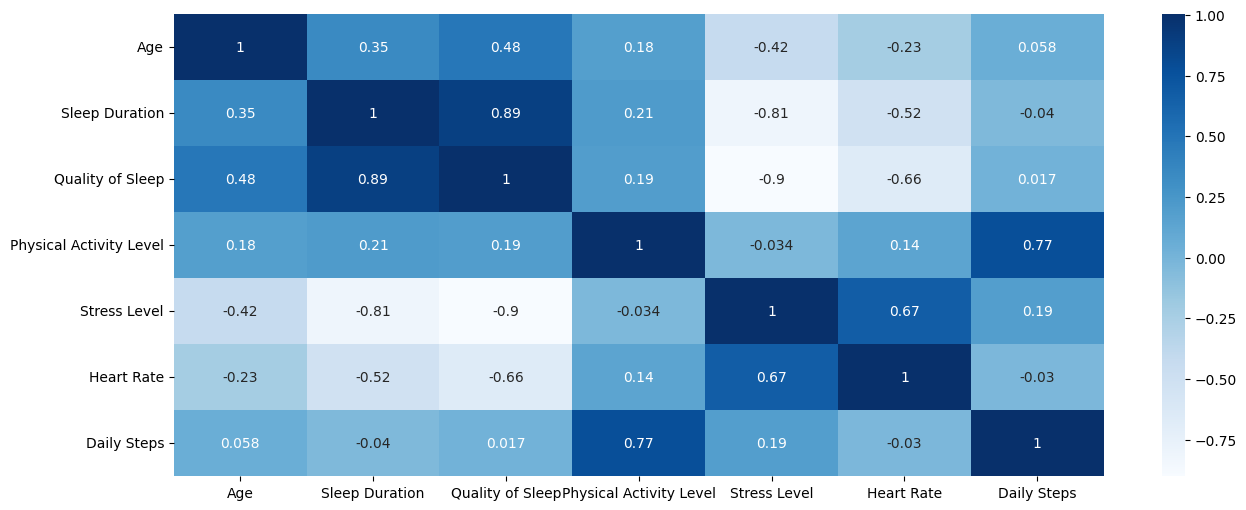

In [4]:
# Построим матрицу ковариаций для проверки наличия связей
plt.figure(figsize=(15, 6))
sns.heatmap(df.cov(), annot=True, cmap="Blues") # Метод df.cov() возвращает ковариационную матрицу
# По ковариационной матрице делаем вывод, что между переменными есть связь

In [5]:
# Импортируем библиотеки для проведения факторного анализа
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [6]:
# Проверим подходят ли данные для факторного анализа при помощи Критерия Бартлетта
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Статистика:",chi_square_value, "P-value:", p_value)
# p_value равно нулю, следовательно данные подходят, тест статистически значим

Статистика: 2236.092733567358 P-value: 0.0


In [7]:
# Тест Кайзера-Мейера-Олкина
kmo_all, kmo_model = calculate_kmo(df)
print("КМО:",kmo_model)
# Значение близкое к 0,6 говорит об удовлетворительной адекватности данных

КМО: 0.6149594748972398


In [8]:
model = FactorAnalyzer() # Создаем объект факторного анализа
model.fit(df) # Обучаем данные
ev, v = model.get_eigenvalues() # Получаем собсвенные значения и собственные вектора
ev

array([3.48370838, 1.82328943, 0.79495298, 0.5956675 , 0.1573186 ,
       0.08862156, 0.05644155])

Text(0, 0.5, 'Собственные значения')

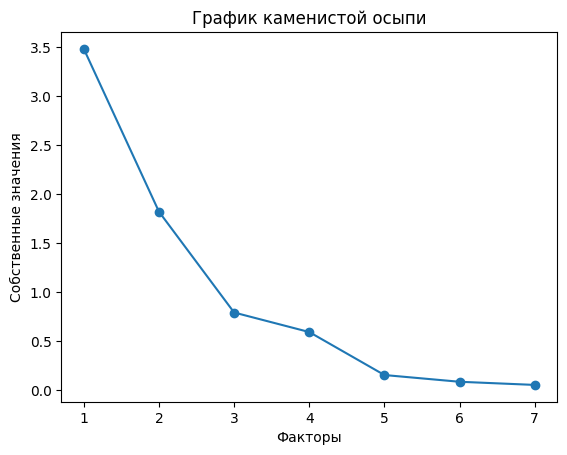

In [9]:
# Для определения числа факторов используем график каменистой осыпи. Метод заключается в поиске точки, где убывание собственных значений замедляется наиболее сильно
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('График каменистой осыпи')
plt.xlabel('Факторы')
plt.ylabel('Собственные значения')
# По данному графику можем определить, что для нас будет достаточно 2-3 фактора

In [10]:
# Проведем новый факторный анализ с известным числом фокторов
model = FactorAnalyzer()
model.set_params(n_factors=2, rotation='varimax') # Настраиваем к-во факторов
model.fit(df)
loadings = model.loadings_ # Сохраним корреляцию между переменными и факторами

In [11]:
df_fa = pd.DataFrame(loadings)
df_fa.columns=[ 'Factor1', 'Factor2']
df_fa

,Factor1,Factor2
0,0.432141,0.122496
1,0.854998,0.076542
2,0.996891,0.089134
3,0.112445,1.001760
4,-0.956362,0.115429
5,-0.647160,0.107791
6,-0.052371,0.761649


<Axes: >

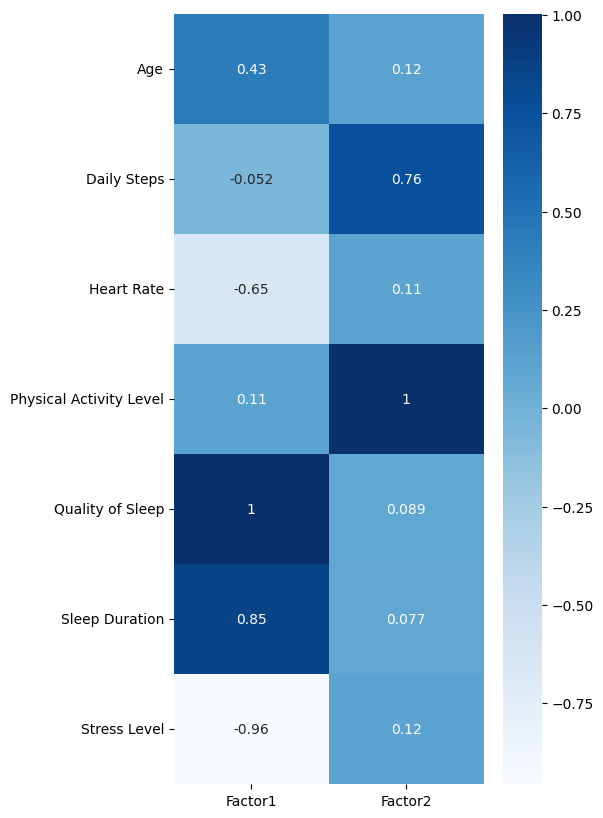

In [12]:
# Визуализируем тепловую карту для наглядности
df_fa_pivot = (df_fa.pivot_table(index=df.columns))
plt.figure(figsize=(5, 10))
sns.heatmap(df_fa_pivot, annot=True, cmap="Blues" )
# В результате мы можем сделать вывод, что на первый фактор влияет возраст, качество сна и его продолжительность, 
# на второй фактор оказывают влияние переменные связанные с общим состоянием организма и уровнем физической активности

In [13]:
# Вывести факторы можно с помощью метода model.transform()
model.transform(df)[:10]

array([[-0.6222333 , -0.94458952],
       [-0.79443042, -0.74696521],
       [-0.79443042, -0.74696521],
       [-2.28152615, -2.0603003 ],
       [-2.28152615, -2.0603003 ],
       [-2.28152615, -2.0603003 ],
       [-0.73460004, -1.12466836],
       [-0.4526812 ,  0.72561469],
       [-0.4526812 ,  0.72561469],
       [-0.4526812 ,  0.72561469]])

### Задание  
Провести факторный анализ для данных об ирисах https://www.kaggle.com/datasets/uciml/iris тремя способами. Каждый раз менять параметр rotation в методе model.set_params(), сравнить полученные результаты и факторы. Методы rotation: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.